# Problem definition and goals

In this notebook, we will try to classify and group pokemons together as an exercise on classifcation 

we will also try to predict whether a pokemon is legendary or not based on its features as the author of the dataset suggested 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
%matplotlib inline

#suppress warnings
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./pokemon.csv')
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


# Features meaning

- name: The English name of the Pokemon
- japanese_name: The Original Japanese name of the Pokemon
- pokedex_number: The entry number of the Pokemon in the National Pokedex
- percentage_male: The percentage of the species that are male. Blank if the Pokemon is genderless.
- type1: The Primary Type of the Pokemon
- type2: The Secondary Type of the Pokemon
- classification: The Classification of the Pokemon as described by the Sun and Moon Pokedex
- height_m: Height of the Pokemon in metres
- weight_kg: The Weight of the Pokemon in kilograms
- capture_rate: Capture Rate of the Pokemon
- baseeggsteps: The number of steps required to hatch an egg of the Pokemon
- abilities: A stringified list of abilities that the Pokemon is capable of having
- experience_growth: The Experience Growth of the Pokemon
- base_happiness: Base Happiness of the Pokemon
- against_?: Eighteen features that denote the amount of damage taken against an attack of a particular type
- hp: The Base HP of the Pokemon
- attack: The Base Attack of the Pokemon
- defense: The Base Defense of the Pokemon
- sp_attack: The Base Special Attack of the Pokemon
- sp_defense: The Base Special Defense of the Pokemon
- speed: The Base Speed of the Pokemon
- generation: The numbered generation which the Pokemon was first introduced
- is_legendary: Denotes if the Pokemon is legendary.

In [652]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

# Duplicates

we can see that we don't have any duplicates in our data 

In [653]:
print(df.duplicated('japanese_name').sum())
print(df.duplicated('name').sum())
print(df.duplicated('pokedex_number').sum())


0
0
0


# Dropping unnecessary columns

In [654]:
#let's drop unncesesary columns
original_df = df.copy()
df.drop(['japanese_name', 'pokedex_number', 'name'], axis=1, inplace=True)


#  visualizations

### let's start with the capture rate

I noticed that it has 1 string and the rest are integers, so I fixed it as it caused an error while modeling

In [645]:
df['capture_rate'].value_counts().sort_values(ascending=False).tail(7)

170                         2
205                         1
155                         1
145                         1
35                          1
160                         1
30 (Meteorite)255 (Core)    1
Name: capture_rate, dtype: int64

In [646]:
replace = ''
for i in df['capture_rate']:
    if isinstance(i, str):
        if len(i) > 3:
            print(i)
            replace = replace + i
df[df['capture_rate'] ==replace] 

30 (Meteorite)255 (Core)


you can see that there is one string that we need to handle

In [571]:
df.loc[df.loc[:, 'capture_rate'] == replace , 'capture_rate'] = 30
df['capture_rate'] = pd.to_numeric(df['capture_rate'])


45     250
190     75
255     69
75      61
3       58
120     55
60      50
90      38
30      21
200     19
225     15
25      13
180     11
50       7
150      7
235      7
100      6
140      6
127      5
70       4
125      3
65       3
55       3
170      2
130      2
15       2
220      2
80       2
205      1
155      1
145      1
35       1
160      1
Name: capture_rate, dtype: int64

### generation and capture rate with legendary status

<AxesSubplot:xlabel='capture_rate', ylabel='generation'>

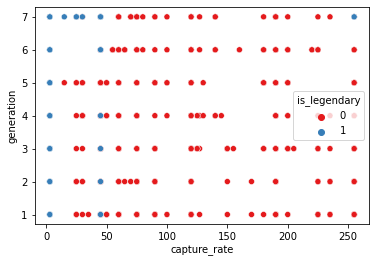

In [572]:
sns.scatterplot(x='capture_rate', y='generation', data=df, hue='is_legendary', palette='Set1')

### capture rates of different types and legendary status

<AxesSubplot:xlabel='type1', ylabel='capture_rate'>

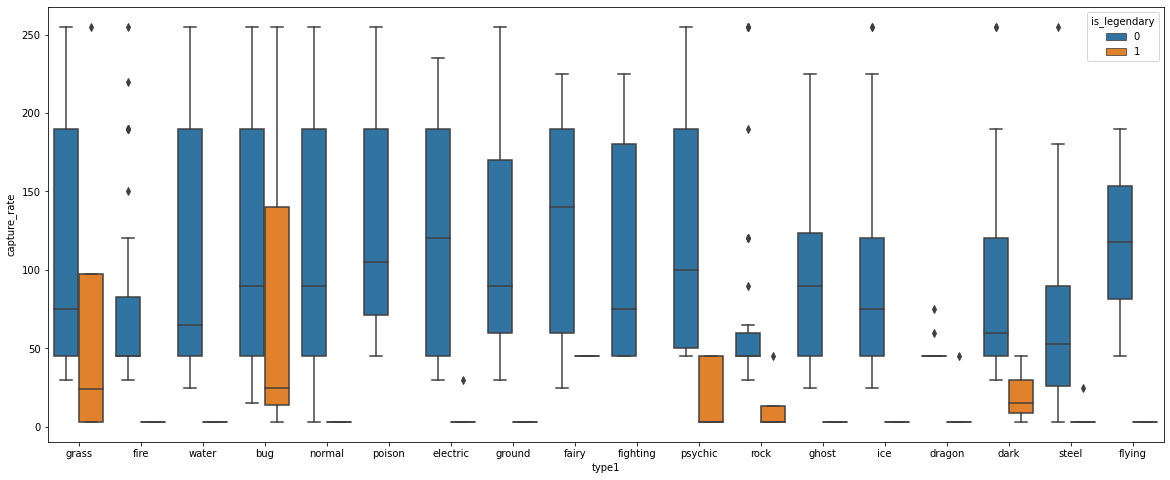

In [573]:
plt.figure(figsize=(20,8))
sns.boxplot(x='type1',y='capture_rate',hue='is_legendary',data=df)

### Feature engineering for types and abilities

<AxesSubplot:xlabel='numberOfAbilities', ylabel='count'>

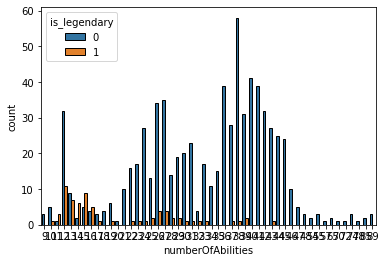

In [574]:
df["numberOfAbilities"] = df.apply(lambda x: len(x["abilities"]), axis=1)
sns.countplot(data=df, x="numberOfAbilities", hue="is_legendary")

In [575]:
df[['abilities', 'numberOfAbilities']].sort_values(by=['numberOfAbilities'], ascending=False).head(3)

,abilities,numberOfAbilities
104,"['Rock Head', 'Lightningrod', 'Battle Armor', ...",89
88,"['Stench', 'Sticky Hold', 'Poison Touch', 'Poi...",89
87,"['Stench', 'Sticky Hold', 'Poison Touch', 'Poi...",89


In [576]:
df['abilities'].iloc[88]

"['Stench', 'Sticky Hold', 'Poison Touch', 'Poison Touch', 'Gluttony', 'Power of Alchemy']"

<AxesSubplot:xlabel='numberOfAbilities', ylabel='count'>

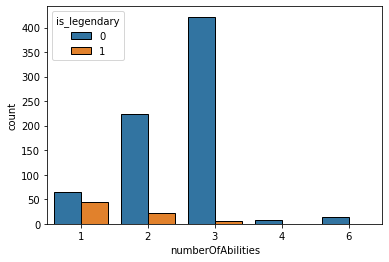

In [578]:
#this is clearly wrong as it got parsed as string not list, so let's fix it
df["abilities"] = df.apply(lambda x: literal_eval(x["abilities"]), axis=1)
df["numberOfAbilities"] = df.apply(lambda x: len(x["abilities"]), axis=1)
sns.countplot(data=df, x="numberOfAbilities", hue="is_legendary")


To the left, non-legendary


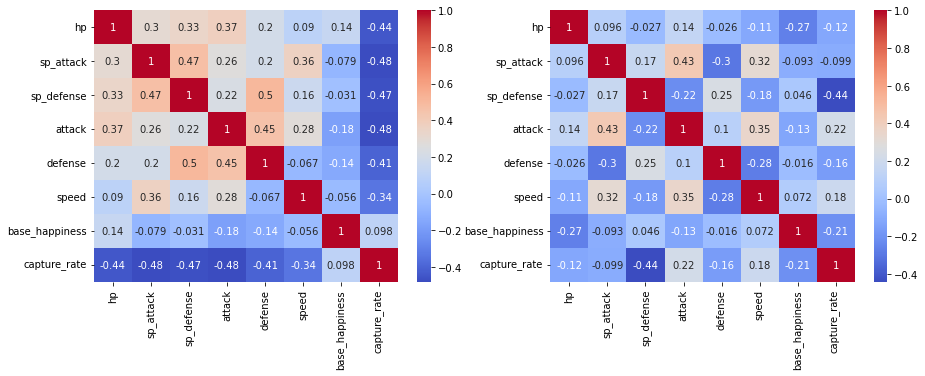

<Figure size 1440x576 with 0 Axes>

In [579]:
print("To the left, non-legendary")
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
attrib = ['hp','sp_attack','sp_defense','attack','defense','speed', 'base_happiness', 'capture_rate']
sns.heatmap((df[df['is_legendary']==0][attrib]).corr(), annot=True, ax=ax1, cmap='coolwarm')
sns.heatmap((df[df['is_legendary']==1][attrib]).corr(), annot=True, ax=ax2, cmap='coolwarm')
plt.figure(figsize=(20,8))
plt.show()


<AxesSubplot:ylabel='type1'>

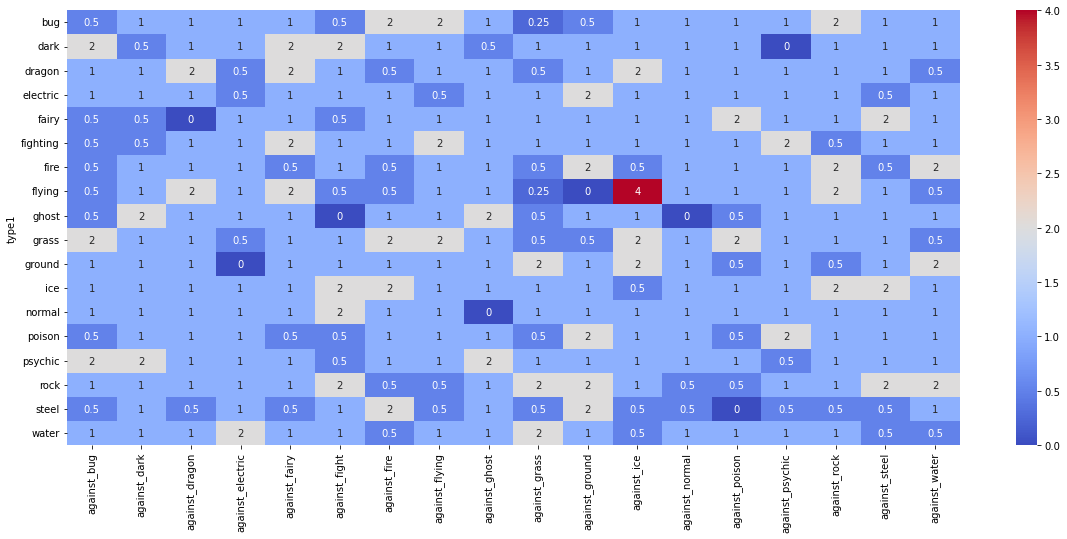

In [580]:
#understanding powers
against = df.columns[df.columns.str.contains('against')]
speciality = df.groupby(['type1']).median()[against]
plt.figure(figsize=(20,8))
sns.heatmap(speciality, annot=True, cmap='coolwarm')

<AxesSubplot:xlabel='is_legendary', ylabel='base_total'>

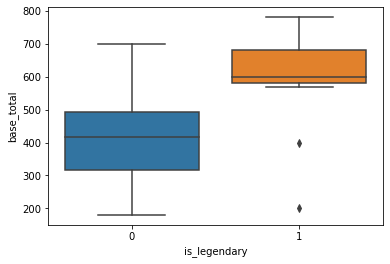

In [581]:
#plotting base total relation with legendary status
sns.boxplot(x='is_legendary', y='base_total', data=df)


<AxesSubplot:xlabel='is_legendary', ylabel='experience_growth'>

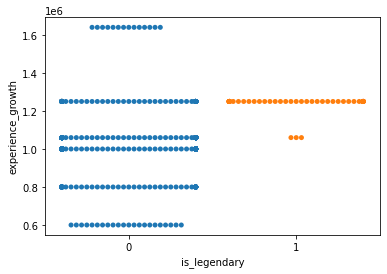

In [582]:
sns.swarmplot(x='is_legendary', y='experience_growth', data=df)


### Missing type 2

In [583]:
df.type2.fillna('NoType', inplace=True)

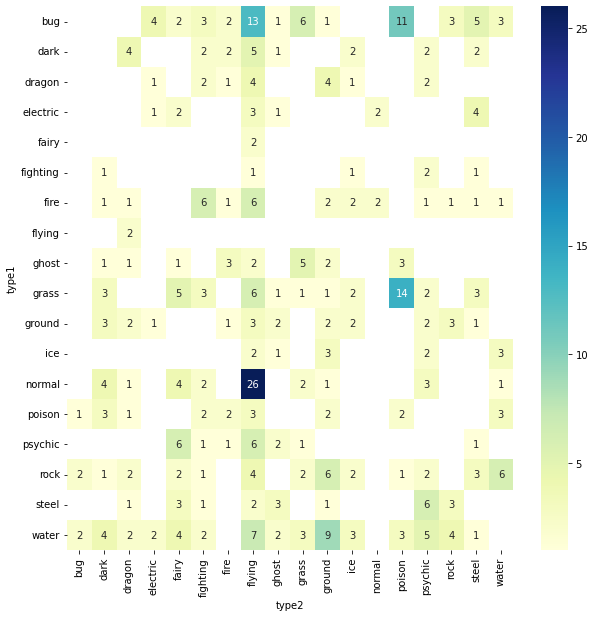

In [584]:
plt.subplots(figsize=(10, 10))
sns.heatmap(df[df['type2'] != 'NoType'].groupby(['type1', 'type2']).size().unstack(), annot = True, cmap='YlGnBu')
plt.show()

In [585]:
#get columns that start with 'against'
against = df.columns[df.columns.str.startswith('against')].to_list()

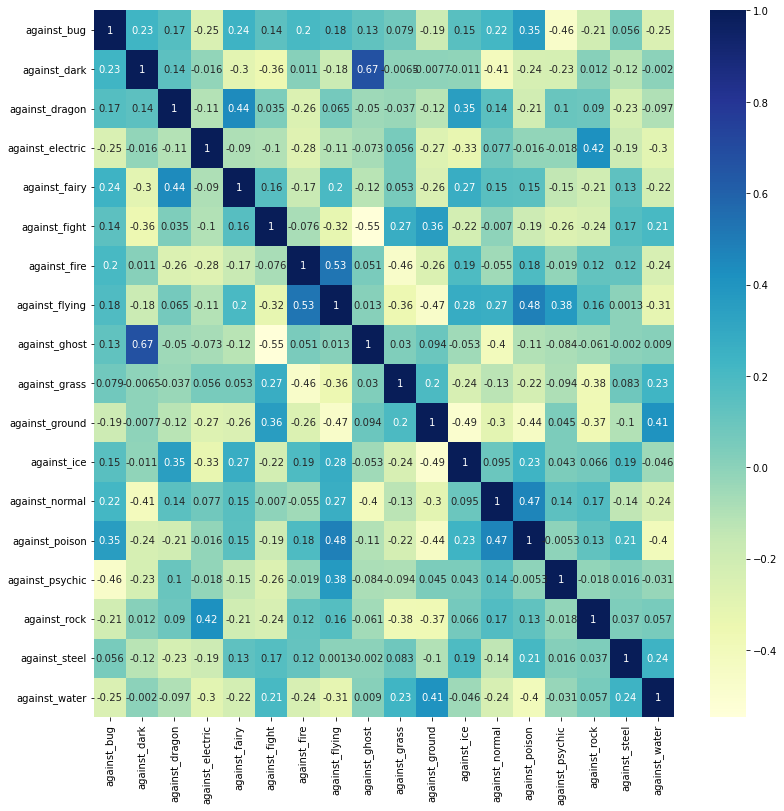

In [586]:
plt.subplots(figsize=(13, 13))
againstC = df[against].corr()
sns.heatmap(againstC, annot = True, cmap='YlGnBu')
plt.show()

### Gender

In [587]:
df.isnull().sum().sort_values(ascending=False).head(6)

percentage_male    98
weight_kg          20
height_m           20
abilities           0
base_total          0
capture_rate        0
dtype: int64

The vast majority of pokemons are 50% males and 50% females, and the second largest group is mostly males (111 with 88.1%)

We only have 27 pokemons that are only females, and 19 that are only males 


remember, we have 98 pokemons that are genderless, so we still need to figure out how to deal with them


In [588]:
#we know that if the percentage male is missing, then the pokemon is genderless 
df.percentage_male.value_counts(dropna=False)

50.0     501
88.1     111
NaN       98
0.0       27
24.6      24
100.0     19
75.4      19
11.2       2
Name: percentage_male, dtype: int64

In [589]:
#to know how to replace it, let's see how pokemons gender distrubution is related to them being legendary or not
print(df.groupby('percentage_male', dropna=False)['is_legendary'].sum(), '\n\n')
print(df.groupby('percentage_male', dropna=False)['is_legendary'].mean())


percentage_male
0.0       2
11.2      0
24.6      0
50.0      1
75.4      0
88.1      0
100.0     4
NaN      63
Name: is_legendary, dtype: int64 


percentage_male
0.0      0.074074
11.2     0.000000
24.6     0.000000
50.0     0.001996
75.4     0.000000
88.1     0.000000
100.0    0.210526
NaN      0.642857
Name: is_legendary, dtype: float64


(0.0, 100.0)

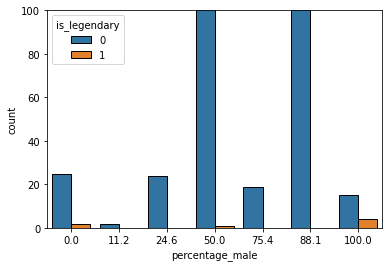

In [590]:
sns.countplot(x='percentage_male', data=df, hue='is_legendary')
plt.ylim(0, 100)

In [591]:
#so, we have 70 legendary pokemons, 63 of which are genderless (a very significant portion)
#Thus, the assumption that filling them with 50% is very wrong here as 50% males has around 1% of the legendary pokemons
df.is_legendary.sum()

70

0    731
1     70
Name: is_legendary, dtype: int64


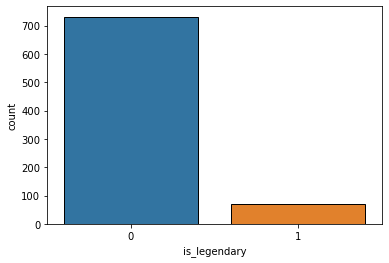

In [592]:
sns.countplot(data=df, x='is_legendary')
print(df['is_legendary'].value_counts())

### Feature engineering Gender

In [593]:
print(df['percentage_male'].unique().tolist())


[88.1, 50.0, 0.0, 100.0, 24.6, 75.4, nan, 11.2]


In [594]:
GenderDict = {np.nan:'GenderLess', 88.1: 'MostlyMale', 75.4 : 'MostlyMale', 50: 'Equal', 24.6:'MostlyFemale', 11.2: 'MostlyFemale', 100:'Male', 0:'Female'}
df['_percentage_male'] = df['percentage_male'].map(GenderDict)
df[['percentage_male', '_percentage_male']].sample(10)

,percentage_male,_percentage_male
673,50.0,Equal
732,50.0,Equal
335,50.0,Equal
93,50.0,Equal
192,50.0,Equal
165,50.0,Equal
566,88.1,MostlyMale
658,50.0,Equal
37,24.6,MostlyFemale
79,50.0,Equal


In [595]:
df = pd.get_dummies(df, columns=['_percentage_male'], drop_first=True)
df.columns.to_list()

['abilities',
 'against_bug',
 'against_dark',
 'against_dragon',
 'against_electric',
 'against_fairy',
 'against_fight',
 'against_fire',
 'against_flying',
 'against_ghost',
 'against_grass',
 'against_ground',
 'against_ice',
 'against_normal',
 'against_poison',
 'against_psychic',
 'against_rock',
 'against_steel',
 'against_water',
 'attack',
 'base_egg_steps',
 'base_happiness',
 'base_total',
 'capture_rate',
 'classfication',
 'defense',
 'experience_growth',
 'height_m',
 'hp',
 'percentage_male',
 'sp_attack',
 'sp_defense',
 'speed',
 'type1',
 'type2',
 'weight_kg',
 'generation',
 'is_legendary',
 'numberOfAbilities',
 '_percentage_male_Female',
 '_percentage_male_GenderLess',
 '_percentage_male_Male',
 '_percentage_male_MostlyFemale',
 '_percentage_male_MostlyMale']

---
### Weights and Heights

In [596]:
missingWHdf = df[np.isnan(df['weight_kg']) | np.isnan(df['height_m']) ]

In [597]:
#we can see that all 20 pokemons who had missing weights, are the same as those who had missing heights
missingWHdf[['weight_kg', 'height_m']].shape

(20, 2)

In [598]:
missingWHdf[['weight_kg', 'height_m']].sample(4)

,weight_kg,height_m
719,NaN,NaN
73,NaN,NaN
27,NaN,NaN
88,NaN,NaN


<AxesSubplot:xlabel='height_m', ylabel='weight_kg'>

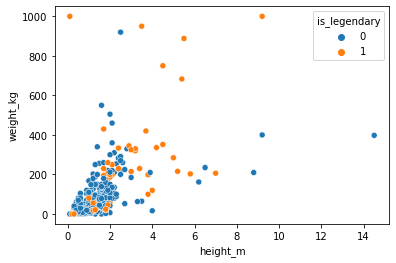

In [599]:
#before fixing them, we need to see the relation between heights, weights and legendary status

sns.scatterplot(x='height_m', y='weight_kg', data=df, hue='is_legendary')

In [600]:
weightMedianLegendary = df[df['is_legendary']==1]['weight_kg'].median()
heightMedianLegendary = df[df['is_legendary']==1]['height_m'].median()

weightMedianNotLegendary = df[df['is_legendary']==0]['weight_kg'].median()
heightMedianNotLegendary = df[df['is_legendary']==0]['height_m'].median()

print(weightMedianLegendary, heightMedianLegendary)
print(weightMedianNotLegendary, heightMedianNotLegendary)

df['weight_kg'] = df['weight_kg'].fillna(df.groupby('is_legendary')['weight_kg'].transform('median'))
df["height_m"] = df['height_m'].fillna(df.groupby('is_legendary')['height_m'].transform('median'))
df[np.isnan(df['weight_kg']) | np.isnan(df['height_m']) ]

120.0 1.8
24.95 0.9


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,type2,weight_kg,generation,is_legendary,numberOfAbilities,_percentage_male_Female,_percentage_male_GenderLess,_percentage_male_Male,_percentage_male_MostlyFemale,_percentage_male_MostlyMale


<AxesSubplot:xlabel='is_legendary', ylabel='height_m'>

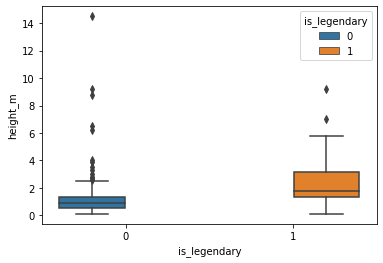

In [601]:
sns.boxplot(x='is_legendary', y='height_m',hue='is_legendary', data=df)

<AxesSubplot:xlabel='is_legendary', ylabel='weight_kg'>

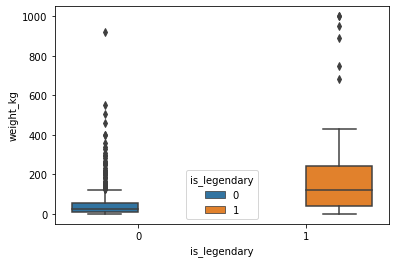

In [602]:
sns.boxplot(x='is_legendary', y='weight_kg',hue='is_legendary', data=df)

### Attack and defense

<AxesSubplot:xlabel='attack', ylabel='defense'>

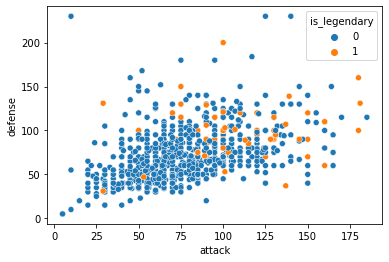

In [603]:
sns.scatterplot(x='attack', y='defense', data=df, hue='is_legendary')

<AxesSubplot:xlabel='sp_attack', ylabel='sp_defense'>

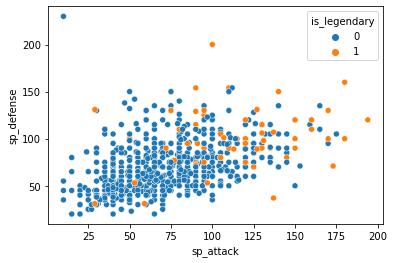

In [604]:
sns.scatterplot(x='sp_attack', y='sp_defense', data=df, hue='is_legendary')

### Speed

<AxesSubplot:xlabel='speed', ylabel='hp'>

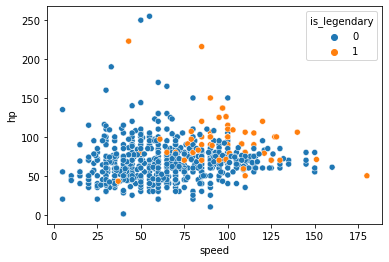

In [605]:
sns.scatterplot(x='speed', y='hp', data=df, hue='is_legendary')

<AxesSubplot:xlabel='is_legendary', ylabel='speed'>

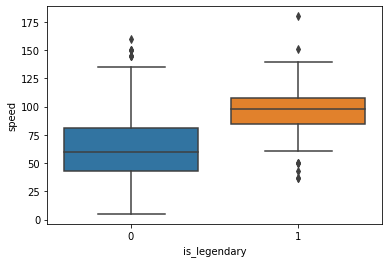

In [606]:
sns.boxplot(y='speed', data=df, x='is_legendary')

### Happiness

<AxesSubplot:xlabel='is_legendary', ylabel='base_happiness'>

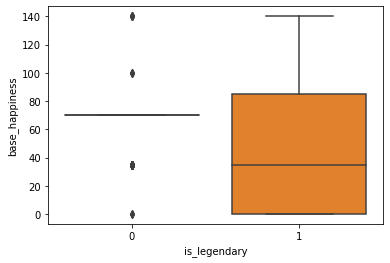

In [607]:
sns.boxplot(y='base_happiness', data=df, x='is_legendary')

In [608]:
print(df.groupby('base_happiness', dropna=False)['is_legendary'].sum(), '\n\n')
print(df.groupby('base_happiness', dropna=False)['is_legendary'].mean())


base_happiness
0      33
35     13
70      6
90      5
100    10
140     3
Name: is_legendary, dtype: int64 


base_happiness
0      0.916667
35     0.188406
70     0.008996
90     1.000000
100    0.714286
140    0.300000
Name: is_legendary, dtype: float64


<AxesSubplot:xlabel='speed', ylabel='base_happiness'>

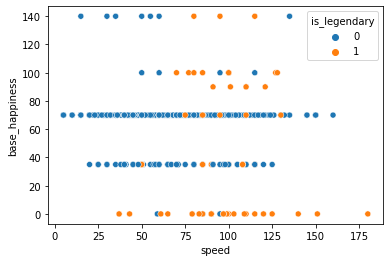

In [609]:
sns.scatterplot(x='speed', y='base_happiness', data=df, hue='is_legendary')

In [610]:
df.type1.value_counts(dropna=False)

water       114
normal      105
grass        78
bug          72
psychic      53
fire         52
rock         45
electric     39
poison       32
ground       32
dark         29
fighting     28
ghost        27
dragon       27
steel        24
ice          23
fairy        18
flying        3
Name: type1, dtype: int64

In [611]:
df.type2.value_counts(dropna=False)

NoType      384
flying       95
poison       34
ground       34
psychic      29
fairy        29
fighting     25
steel        22
dark         21
grass        20
water        17
dragon       17
ice          15
rock         14
ghost        14
fire         13
electric      9
bug           5
normal        4
Name: type2, dtype: int64

I am not an expert in Pokemons, but searching online shows that there is a good reason for those rows (especially those pokemons)

so, I cannot just fill in the type1 in type2 for those missing values, or else I will be saying something wrong about those pokemons due to the nature of the problem 

Therefore, I will replace missing values with a special keyword (NoType2)

In [612]:
#replace type2 nans with "NoType2"
df.type2.fillna('NoType2', inplace=True)

In [613]:
df.type2.value_counts(dropna=False)

NoType      384
flying       95
poison       34
ground       34
psychic      29
fairy        29
fighting     25
steel        22
dark         21
grass        20
water        17
dragon       17
ice          15
rock         14
ghost        14
fire         13
electric      9
bug           5
normal        4
Name: type2, dtype: int64

### Base egg steps

In [614]:
print(df.base_egg_steps.value_counts(), '\n\n')
print(df.groupby('base_egg_steps', dropna=False)['is_legendary'].sum(), '\n\n')
print(df.groupby('base_egg_steps', dropna=False)['is_legendary'].mean())


5120     436
3840     140
6400      55
30720     49
10240     42
7680      26
2560      22
20480     16
8960      13
1280       2
Name: base_egg_steps, dtype: int64 


base_egg_steps
1280      0
2560      2
3840      4
5120      0
6400      1
7680      0
8960      0
10240     0
20480    16
30720    47
Name: is_legendary, dtype: int64 


base_egg_steps
1280     0.000000
2560     0.090909
3840     0.028571
5120     0.000000
6400     0.018182
7680     0.000000
8960     0.000000
10240    0.000000
20480    1.000000
30720    0.959184
Name: is_legendary, dtype: float64


### Health points distribution

<AxesSubplot:xlabel='hp', ylabel='Count'>

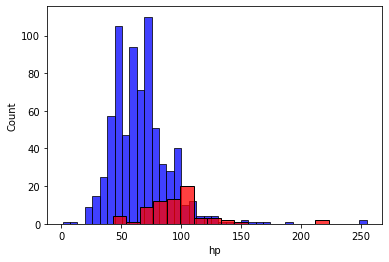

In [615]:
fig, ax = plt.subplots()
sns.histplot(data=df[df['is_legendary']!=1.0], x='hp', ax=ax, color='blue')
sns.histplot(data=df[df['is_legendary']==1.0], x='hp', ax=ax, color='red', label='Legendary')

In [616]:
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot


def qq_plots(df):
    plt.figure(figsize=(10, 4))
    qqplot(df,line='s')
    plt.title("Normal QQPlot")
    plt.show()

<Figure size 720x288 with 0 Axes>

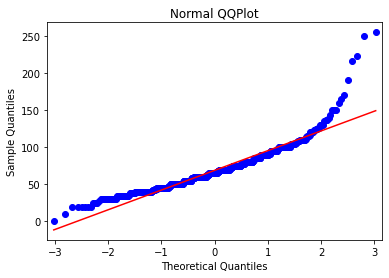

In [617]:
qq_plots(df.hp)

<Figure size 720x288 with 0 Axes>

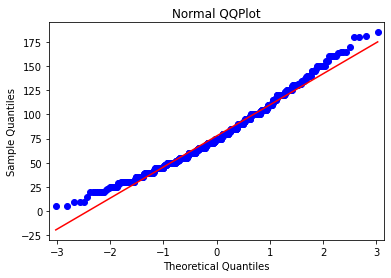

<Figure size 720x288 with 0 Axes>

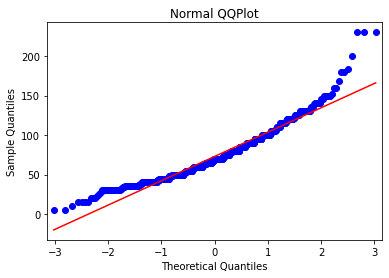

In [618]:
qq_plots(df.attack)

qq_plots(df.defense)


<AxesSubplot:>

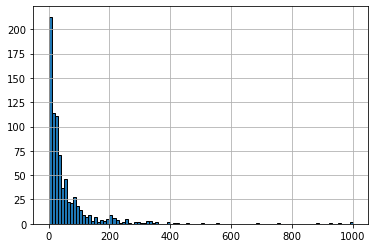

In [619]:
df.weight_kg.hist(bins=100)

<AxesSubplot:>

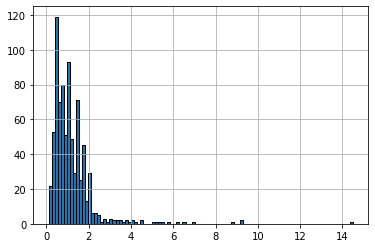

In [620]:
df.height_m.hist(bins=100)

<Figure size 720x288 with 0 Axes>

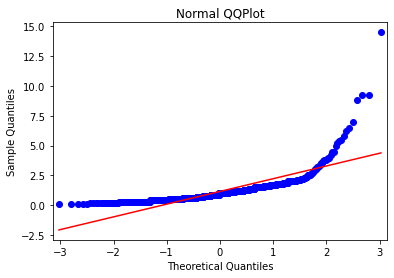

<Figure size 720x288 with 0 Axes>

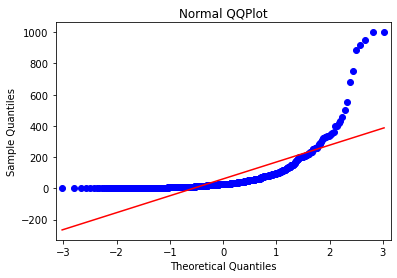

In [621]:
qq_plots(df.height_m)
qq_plots(df.weight_kg)

# Correlation analysis

In [622]:
df.corr().sort_values(by='is_legendary', ascending=False).style.background_gradient(cmap='coolwarm')


,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,percentage_male,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary,numberOfAbilities,_percentage_male_Female,_percentage_male_GenderLess,_percentage_male_Male,_percentage_male_MostlyFemale,_percentage_male_MostlyMale
is_legendary,0.027864,0.136315,0.014844,-0.023151,0.050165,-0.059132,-0.011073,-0.062214,0.170746,-0.070826,0.012812,0.005580,-0.034761,-0.024349,-0.106047,-0.017588,0.001397,-0.020679,0.303295,0.873488,-0.413108,0.485440,-0.327677,0.265587,0.361038,0.323599,0.308405,0.045222,0.406281,0.343241,0.311639,0.394076,0.139029,1.000000,-0.374402,-0.008807,0.734375,0.067964,-0.056680,-0.136207
base_egg_steps,0.062133,0.187220,0.164773,-0.061970,0.120594,-0.006359,-0.044802,-0.091304,0.174115,-0.064971,0.017828,0.046349,-0.068140,-0.106156,-0.129515,-0.048610,-0.021007,-0.019664,0.331088,1.000000,-0.524551,0.496466,-0.355455,0.265230,0.373837,0.382239,0.359218,0.115968,0.404477,0.335404,0.289447,0.443742,0.128941,0.873488,-0.385709,0.009882,0.681136,0.082126,-0.082641,-0.089491
_percentage_male_GenderLess,0.019896,0.212326,-0.064153,-0.046559,-0.020148,-0.018195,0.032925,-0.130247,0.197819,-0.035440,0.105240,-0.065587,-0.156549,-0.116813,-0.152202,-0.089028,-0.002888,0.003333,0.216574,0.681136,-0.409543,0.388858,-0.284095,0.249920,0.273078,0.249122,0.206999,nan,0.326863,0.307201,0.243472,0.367700,0.103366,0.734375,-0.364573,-0.069734,1.000000,-0.058198,-0.068387,-0.164341
base_total,-0.012398,0.065446,0.069766,-0.017137,0.098948,0.048629,-0.061698,-0.106586,0.114179,-0.017340,0.064252,0.021909,-0.105328,-0.097396,-0.106435,-0.038083,-0.006741,0.024011,0.730134,0.496466,-0.274795,1.000000,-0.712275,0.629620,0.256930,0.532034,0.620624,0.098462,0.741120,0.717434,0.547666,0.456081,0.084358,0.485440,-0.226259,0.015842,0.388858,0.054461,-0.089637,0.017934
sp_attack,0.055352,0.170849,0.039739,0.022305,-0.010296,-0.118481,-0.088578,-0.111243,0.233309,-0.093899,0.075511,-0.035767,-0.037069,0.050514,-0.127005,0.074479,-0.076379,-0.060562,0.368154,0.404477,-0.228924,0.741120,-0.520682,0.241882,0.201603,0.352063,0.365973,0.102876,1.000000,0.511496,0.438981,0.247171,0.070146,0.406281,-0.281068,-0.000911,0.326863,-0.029131,-0.052280,0.082855
weight_kg,-0.032048,0.042210,0.125154,-0.094637,0.100642,0.155429,-0.041208,-0.122388,0.052143,0.041979,0.104190,0.014660,-0.136192,-0.198508,-0.089345,-0.107818,0.013579,0.102999,0.378700,0.443742,-0.404850,0.456081,-0.325735,0.418072,0.247450,0.627367,0.425256,0.050055,0.247171,0.306507,0.050544,1.000000,0.094123,0.394076,-0.142730,-0.056880,0.367700,-0.022792,-0.072554,-0.048905
experience_growth,0.035717,-0.008391,0.172547,-0.041584,0.146370,0.010407,-0.027136,0.019100,0.059262,-0.039623,0.015118,0.069633,0.065707,-0.025497,-0.009114,-0.041418,-0.075842,-0.018585,0.241087,0.373837,-0.295348,0.256930,-0.173575,0.129698,1.000000,0.247118,0.214068,0.023671,0.201603,0.088806,0.144946,0.247450,0.052530,0.361038,-0.127766,0.009681,0.273078,0.037632,-0.208082,-0.075267
sp_defense,-0.002342,0.132507,-0.047416,0.019193,0.002754,-0.044460,-0.019520,-0.079022,0.195439,-0.056427,0.058397,-0.043342,-0.111376,-0.006453,-0.093377,-0.014870,0.055443,-0.054123,0.265836,0.335404,-0.149719,0.717434,-0.522616,0.526348,0.088806,0.327811,0.366971,0.009703,0.511496,1.000000,0.225977,0.306507,0.048711,0.343241,-0.168395,0.104633,0.307201,0.047794,-0.057441,-0.007818
height_m,-0.060274,0.023652,0.163841,0.007844,0.116746,0.055099,-0.083446,-0.070063,0.037120,0.024831,-0.006871,0.066160,-0.076604,-0.122309,-0.023283,-0.032602,-0.030550,0.026622,0.419752,0.382239,-0.342237,0.532034,-0.378707,0.356984,0.247118,1.000000,0.474881,0.042584,0.352063,0.327811,0.199483,0

# Classification and legendary pokemon prediction

In [623]:
#print object columns
print(df.select_dtypes(include=['object']).columns)

Index(['abilities', 'classfication', 'type1', 'type2'], dtype='object')


In [624]:
df.classfication.nunique(dropna=False)

588

In [625]:
for col in df.columns.to_list():
    if np.any(df[col].isnull()):
        print(col)

percentage_male


In [626]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df.type1 = le.fit_transform(df.type1)
df.type2 = le.fit_transform(df.type2)
df.classfication = le.fit_transform(df.classfication)


In [627]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'percentage_male', 'sp_attack', 'sp_defense', 'speed', 'type1', 'type2',
       'weight_kg', 'generation', 'is_legendary', 'numberOfAbilities',
       '_percentage_male_Female', '_percentage_male_GenderLess',
       '_percentage_male_Male', '_percentage_male_MostlyFemale',
       '_percentage_male_MostlyMale'],
      dtype='object')

In [628]:
#find all object columns
df.select_dtypes(include=['object']).columns

Index(['abilities'], dtype='object')

## Random Forests

In [629]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

RFmodel = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
X = df.drop(['is_legendary', 'abilities', 'percentage_male'], axis=1)
y = df['is_legendary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
RFmodel.fit(X_train, y_train)
RFmodel.score(X_test, y_test)


0.9937888198757764

## Logistic regression


In [630]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
#get scores
print("Training score without scaling: ", logisticRegr.score(X_train, y_train))
print("Test score without scaling: ", logisticRegr.score(X_test, y_test))
print('\n\n')


Training score without scaling:  0.9890625
Test score without scaling:  0.9751552795031055





## XGBoost

In [631]:
import xgboost as xgb
xg_reg = xgb.XGBClassifier(learning_rate = 0.1,
                max_depth = 15, n_estimators = 20)

xg_reg = xg_reg.fit(X_train, y_train)
predictions = xg_reg.predict(X_test)
print("Training score after scaling: ", xg_reg.score(X_train, y_train))
print("Testing score after scaling: ",xg_reg.score(X_test, y_test))

[13:10:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training score after scaling:  0.99375
Testing score after scaling:  0.9937888198757764


## SVM

In [632]:
def testSVC(kernelC):
    print("Kernel: ", kernelC)
    svc = SVC(kernel=kernelC)
    svc.fit(X_train, y_train)
    print("Training score ", svc.score(X_train, y_train))
    print("Testing score ", svc.score(X_test, y_test))

In [633]:
##SVM

from sklearn.svm import SVC
testSVC('linear')
testSVC('poly')
testSVC('rbf')
testSVC('sigmoid')


Kernel:  linear
Training score  0.9875
Testing score  0.9875776397515528
Kernel:  poly
Training score  0.9140625
Testing score  0.906832298136646
Kernel:  rbf
Training score  0.9140625
Testing score  0.906832298136646
Kernel:  sigmoid
Training score  0.9140625
Testing score  0.906832298136646


## AdaBoost

In [634]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=20, random_state=44, learning_rate=4)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print("Training score", clf.score(X_train, y_train))
print("Testing score", clf.score(X_test, y_test))


Training score 0.996875
Testing score 0.9937888198757764


## KNN 

In [635]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, y_train)

predictions = neigh.predict(X_test)
print("Training score after scaling: ", neigh.score(X_train, y_train))
print("Testing score after scaling: ",neigh.score(X_test, y_test))

Training score after scaling:  0.9890625
Testing score after scaling:  0.968944099378882


## Naive Bayes Classifier

In [636]:
from sklearn.naive_bayes import GaussianNB

GaussianClassification = GaussianNB()
GaussianClassification.fit(X_train, y_train)


print("Training score after scaling: ", GaussianClassification.score(X_train, y_train))
print("Testing score after scaling: ",GaussianClassification.score(X_test, y_test))

Training score after scaling:  0.9390625
Testing score after scaling:  0.9316770186335404


# References
- https://www.kaggle.com/datasets/rounakbanik/pokemon
- https://www.pokemon.com/us/pokedex/